# 5-2

Prompt:

手寫辨認(Dense NN, CNN= tf.keras),executable on colab

安裝 TensorFlow

In [ ]:
!pip install tensorflow

匯入必要的套件並載入 MNIST 資料集

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 載入 MNIST 資料集
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 資料預處理：將圖片資料正規化至 [0, 1] 範圍
train_images = train_images / 255.0
test_images = test_images / 255.0

# 重新整理資料形狀 (28x28x1) 以符合 CNN 輸入要求
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


建立神經網絡模型

Dense Neural Network (DNN)

In [ ]:
# 建立一個簡單的 DNN 模型
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 展平 28x28 的圖片資料
    layers.Dense(128, activation='relu'),  # 隱藏層
    layers.Dense(10, activation='softmax')  # 輸出層，10 類別（0~9）
])

# 編譯模型
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 訓練模型
model_dnn.fit(train_images, train_labels, epochs=5)

# 測試模型
test_loss, test_acc = model_dnn.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8784 - loss: 0.4332
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1200
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9763 - loss: 0.0786
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9815 - loss: 0.0610
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9861 - loss: 0.0451
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0878
Test accuracy: 0.9761999845504761


Convolutional Neural Network (CNN)

In [ ]:
# 建立一個 CNN 模型
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 卷積層
    layers.MaxPooling2D((2, 2)),  # 池化層
    layers.Conv2D(64, (3, 3), activation='relu'),  # 另一層卷積層
    layers.MaxPooling2D((2, 2)),  # 池化層
    layers.Conv2D(64, (3, 3), activation='relu'),  # 另一層卷積層
    layers.Flatten(),  # 展平資料
    layers.Dense(64, activation='relu'),  # 全連接層
    layers.Dense(10, activation='softmax')  # 輸出層
])

# 編譯模型
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 訓練模型
model_cnn.fit(train_images, train_labels, epochs=5)

# 測試模型
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8974 - loss: 0.3209
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9851 - loss: 0.0485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9893 - loss: 0.0328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9928 - loss: 0.0242
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9946 - loss: 0.0171
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9867 - loss: 0.0416
Test accuracy: 0.9894999861717224


測試模型預測

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


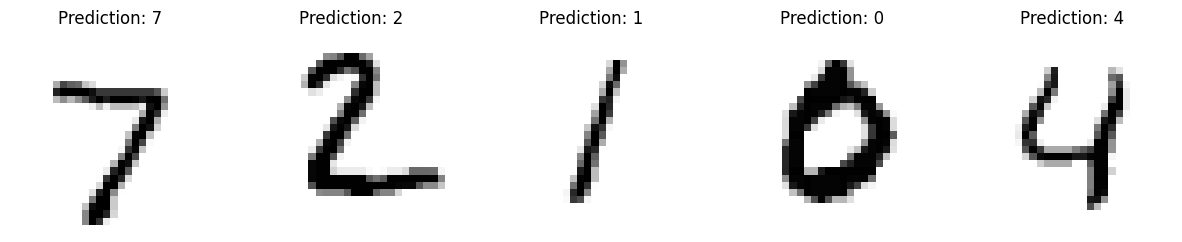

In [ ]:
# 預測測試資料
predictions = model_cnn.predict(test_images)

# 顯示其中五張圖片及其預測結果
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Prediction: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()